# Notebook to process fimo results and assess TFBS differences

In [1]:
import pandas as pd 
import numpy as np 
import os
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 700)

### Variables 

In [3]:
fimo_f = '03_fimo/FIMO_results/hum_tf/fimo.txt'
Motif_info_f = '03_fimo/Kaia_FIMO/motif_info.txt'
motif_map_f = '03_fimo/Kaia_FIMO/curated_motif_map.txt'

### Read files

In [4]:
fimo = pd.read_csv(fimo_f, sep='\t')
fimo.head()

,# motif_id,motif_alt_id,sequence_name,start,stop,strand,score,p-value,q-value,matched_sequence
0,ZNF496,ZNF496,chr3:48020950:48021085__rs28637561__3:48021018...,32,61,+,55.8265,2.800000e-19,9.610000e-14,GTCGCCCAGGCTGGAGTGCAGTGGCGCAAT
1,ZNF496,ZNF496,chr3:48020950:48021085__rs28637561__3:48021018...,32,61,+,55.8265,2.800000e-19,9.610000e-14,GTCGCCCAGGCTGGAGTGCAGTGGCGCAAT
2,ZNF496,ZNF496,chr1:9440193:9440328__rs28742181__1:9440261:C:...,16,45,-,55.8265,2.800000e-19,9.610000e-14,GTCGCCCAGGCTGGAGTGCAGTGGCGCAAT
3,ZNF496,ZNF496,chr1:9440193:9440328__rs28742181__1:9440261:C:...,16,45,-,55.8265,2.800000e-19,9.610000e-14,GTCGCCCAGGCTGGAGTGCAGTGGCGCAAT
4,ZNF496,ZNF496,chr1:9440130:9440265__rs28669777__1:9440198:C:...,79,108,-,55.8265,2.800000e-19,9.610000e-14,GTCGCCCAGGCTGGAGTGCAGTGGCGCAAT


In [5]:
motif_info = pd.read_csv(Motif_info_f, sep='\t')
motif_info.head()

,Ensembl ID,HGNC symbol,Motif evidence,Motif ID,Motif type,Motif source,CIS-BP ID,Best Motif(s)? (Figure 2A)
0,ENSG00000267281,AC023509.3,"Inferred - ATF7 (100% AA Identity, Homo sapiens)",ATF7_eDBD_HT-SELEX,HT-SELEX,Yin2017,M08490_1.94d,True
1,ENSG00000267281,AC023509.3,"Inferred - ATF7 (100% AA Identity, Homo sapiens)",ATF7_eDBD_Methyl-HT-SELEX,Methyl-HT-SELEX,Yin2017,M08491_1.94d,NaN
2,ENSG00000267281,AC023509.3,"Inferred - Atf7 (98% AA Identity, Mus musculus)",3T3L1-Atf7_GSE56872,Misc,HOMER,M06975_1.94d,NaN
3,ENSG00000264668,AC138696.1,"Inferred - ZFP41 (100% AA Identity, Homo sapiens)",ZFP41_FL_HT-SELEX,HT-SELEX,Yin2017,M09315_1.94d,True
4,ENSG00000264668,AC138696.1,"Inferred - ZFP41 (100% AA Identity, Homo sapiens)",ZFP41_FL_Methyl-HT-SELEX,Methyl-HT-SELEX,Yin2017,M09316_1.94d,NaN


In [6]:
motif_map = pd.read_csv(motif_map_f, sep='\t')
motif_map.head()

,index,gene_id,gene_name
0,HKR1,ENSG00000181666,HKR1
1,M00117_1,ENSG00000137203,TFAP2A
2,M00118_1,ENSG00000137203,TFAP2A
3,M00119_1,ENSG00000137203,TFAP2A
4,M00120_1,ENSG00000137203,TFAP2A


In [7]:
fimo['# motif_id'].unique()[1:10]

array(['ZNF212', 'ZNF287', 'ZNF785', 'ZNF235', 'ZNF432', 'M07143_1',
       'M10430_1', 'M06438_1', 'M10438_1'], dtype=object)

In [8]:
motif_map[motif_map['index'] == 'ZNF212']

,index,gene_id,gene_name
5407,ZNF212,ENSG00000170260,ZNF212


In [9]:
### activity info ###
data_file = "../data/02_activs/CM_vals.significance.5.txt"
activity = pd.read_csv(data_file, sep='\t')
activity.head()

,CM,CM_pval,CM_padj,element,tile_type,parse_details,name,tile_number,chrom,strand,actual_start,actual_end,snp,dupe_info,is_snp,CM_log,tile_id,type,sig,full_name
0,0.205892,0.373847,0.884949,AAAGGCTGTGATTGTACGTGCAACTGTCATCTTGCTGGGATTGTGT...,CONTROL_SNP_INDIV,chr3:171858455:171858590__rs6445040__3:1718585...,chr3:171858455:171858590__rs6445040__3:1718585...,1,chr3,+,171858455,171858590,rs6445040,4625,68.0,-0.686360,4625,CONTROL_SNP_INDIV,not sig,chr3:171858455:171858590__rs6445040__3:1718585...
1,0.407816,0.000002,0.000069,AAAGGCTGTGATTGTACGTGCAACTGTCATCTTGCTGGGATTGTGT...,CONTROL_BUT_HAS_SNP,chr3:171858455:171858590__rs6445040__3:1718585...,chr3:171858455:171858590__rs6445040__3:1718585...,1,chr3,+,171858455,171858590,none,4625,0.0,-0.389536,4625,CONTROL_BUT_HAS_SNP,sig,chr3:171858455:171858590__rs6445040__3:1718585...
2,0.168798,0.676573,0.884949,AACAGTGAAAATGATAATTCAAACTAATACTGTTTACAGGGAGTTA...,CONTROL_SNP_INDIV,chr9:104195602:104195737__rsFakeAldoB101__9:10...,chr9:104195602:104195737__rsFakeAldoB101__9:10...,1,chr9,+,104195602,104195737,rsFakeAldoB101,4621,68.0,-0.772633,4621,CONTROL_SNP_INDIV,not sig,chr9:104195602:104195737__rsFakeAldoB101__9:10...
3,0.178422,0.600955,0.884949,AACAGTGAAAATGATAATTCAAACTAATACTGTTTACAGGGAGTTA...,CONTROL_BUT_HAS_SNP,chr9:104195602:104195737__rsFakeAldoB101__9:10...,chr9:104195602:104195737__rsFakeAldoB101__9:10...,1,chr9,+,104195602,104195737,none,4621,0.0,-0.748552,4621,CONTROL_BUT_HAS_SNP,not sig,chr9:104195602:104195737__rsFakeAldoB101__9:10...
4,0.194269,0.469184,0.884949,ACAGACAATAACTCAGTGCCTGGCAAACAGTGAGCACTATGCAAAC...,CONTROL_SNP_INDIV,chr7:151541672:151541807__rs60002611__7:151541...,chr7:151541672:151541807__rs60002611__7:151541...,1,chr7,+,151541672,151541807,rs60002611,4627,68.0,-0.711597,4627,CONTROL_SNP_INDIV,not sig,chr7:151541672:151541807__rs60002611__7:151541...


In [10]:
### activity info Mital ###
data_file = "../data/02_activs/CM_vals.significance.Mital.5.txt"
activity_mital = pd.read_csv(data_file, sep='\t')
activity_mital.head()

,CM,CM_pval,CM_padj,element,tile_type,parse_details,name,tile_number,chrom,strand,actual_start,actual_end,snp,dupe_info,is_snp,CM_log,tile_id,type,sig,full_name
0,0.216182,0.295293,0.764980,AAACCCCCCGGGCCATTGTGTGTGTTTACGTAGGAAGGCGCTGCAT...,WILDTYPE_SNP_INDIV,chr7:140624155:140624290__7:140624223:G:A__7:1...,chr7:140624155:140624290__7:140624223:G:A__7:1...,1,chr7,+,140624155,140624290,7:140624223:G:A,4670,68.0,-0.665181,4670,WILDTYPE_SNP_INDIV,not sig,chr7:140624155:140624290__7:140624223:G:A__7:1...
1,0.211050,0.333561,0.781983,AAACCCCCCGGGCCATTGTGTGTGTTTACGTAGGAAGGCGCTGCAT...,WILDTYPE_BUT_HAS_SNP,chr7:140624155:140624290__7:140624223:G:A__7:1...,chr7:140624155:140624290__7:140624223:G:A__7:1...,1,chr7,+,140624155,140624290,none,4670,0.0,-0.675615,4670,WILDTYPE_BUT_HAS_SNP,not sig,chr7:140624155:140624290__7:140624223:G:A__7:1...
2,0.218855,0.276195,0.761541,AAAGGGAATGTGTTCGAGACCTCTTTCGTCGGCCGATTGATTGAAT...,RANDOM,NaN,RANDOM,0,NaN,NaN,0,0,none,3,NaN,-0.659844,3,negative control,not sig,RANDOM_negative control
3,0.186901,0.530914,0.871943,AAATGTACGTATGCTGCTAGCCGGGCAGCCTCGAGATGGCCTCCCC...,RANDOM,NaN,RANDOM,0,NaN,NaN,0,0,none,2,NaN,-0.728389,2,negative control,not sig,RANDOM_negative control
4,0.209453,0.345855,0.781983,AACATTACACCAGGTGCGTTCGCAAACAGAACCATCCTCACGCGTG...,RANDOM,NaN,RANDOM,0,NaN,NaN,0,0,none,9,NaN,-0.678913,9,negative control,not sig,RANDOM_negative control


In [11]:
### differential snp analysis ###
snp_file = "../analysis/01_mpra/06_process_mpranalyze_comp/results_comparisons_ordered.CM.005.new_back.txt"
snp_comp = pd.read_csv(snp_file, sep='\t', index_col=0)
snp_comp.head()

,index,stat_comp,pval_comp,fdr_comp,df.test_comp,df.dna_comp,df.rna.full_comp,df.rna.red_comp,logFC_comp,dupe_info,tile_type,native_status,is_ctrl,abs_ef,snp
1,1359__WILDTYPE_SNP_INDIV,484.282029,2.500301e-107,1.201645e-103,1.0,26.0,5.0,4.0,-3.866859,1359,WILDTYPE_SNP_INDIV,significant effect,sequence,3.866859,rs7630685
3,322__WILDTYPE_SNP_INDIV,404.138124,6.920356e-90,8.314808e-87,1.0,26.0,5.0,4.0,3.508520,322,WILDTYPE_SNP_INDIV,significant effect,sequence,3.508520,rs12591513
5,549__WILDTYPE_SNP_INDIV,292.665336,1.305608e-65,1.045792e-62,1.0,25.0,5.0,4.0,3.033218,549,WILDTYPE_SNP_INDIV,significant effect,sequence,3.033218,rs77431689
7,709__WILDTYPE_SNP_INDIV,329.516810,1.224692e-73,1.177174e-70,1.0,26.0,5.0,4.0,-2.998405,709,WILDTYPE_SNP_INDIV,significant effect,sequence,2.998405,rs61818805
9,670__WILDTYPE_SNP_INDIV,464.077640,6.230671e-103,1.497230e-99,1.0,26.0,5.0,4.0,2.423458,670,WILDTYPE_SNP_INDIV,significant effect,sequence,2.423458,rs60900293


In [150]:
### differential snp analysis Mital###
snp_file = "../analysis/01_mpra/06_process_mpranalyze_comp/results_comparisons_ordered.CM.005.Mital.txt"
snp_comp_mital = pd.read_csv(snp_file, sep='\t', index_col=0)
snp_comp_mital.head()

,index,stat_comp,pval_comp,fdr_comp,df.test_comp,df.dna_comp,df.rna.full_comp,df.rna.red_comp,logFC_comp,is_ctrl,tile_type,dupe_info,native_status,abs_ef,snp
1,4654__WILDTYPE_SNP_INDIV,17.006955,3.724314e-05,1.123400e-04,1,8,5,4,-2.718187,sequence,WILDTYPE_SNP_INDIV,4654,significant effect,2.718187,6:7541847:C:G
3,4672__WILDTYPE_SNP_INDIV,5.353677,2.067861e-02,3.555948e-02,1,6,5,4,2.233715,sequence,WILDTYPE_SNP_INDIV,4672,significant effect,2.233715,7:151329563:G:A
5,4684__WILDTYPE_SNP_INDIV,17.989503,2.221265e-05,7.170399e-05,1,12,5,4,1.703100,sequence,WILDTYPE_SNP_INDIV,4684,significant effect,1.703100,10:112678405:C:G
7,4670__WILDTYPE_SNP_INDIV,108.092350,2.565417e-25,4.720368e-23,1,26,5,4,-1.135219,sequence,WILDTYPE_SNP_INDIV,4670,significant effect,1.135219,7:140624223:G:A
9,4678__WILDTYPE_SNP_INDIV,79.787027,4.170219e-19,3.069281e-17,1,26,5,4,-1.050181,sequence,WILDTYPE_SNP_INDIV,4678,significant effect,1.050181,8:124553600:C:T


In [12]:
activity[activity['snp']=='rs140324600']

,CM,CM_pval,CM_padj,element,tile_type,parse_details,name,tile_number,chrom,strand,actual_start,actual_end,snp,dupe_info,is_snp,CM_log,tile_id,type,sig,full_name
7957,0.19488,0.464077,0.884949,TCGGAATAGAGATCTACAACCATCTGATCTTTGACAAACCTGACAA...,WILDTYPE_SNP_INDIV,chr3:41971660:41971795__rs140324600__3:4197172...,chr3:41971660:41971795__rs140324600__3:4197172...,1,chr3,+,41971660,41971795,rs140324600,4278,68.0,-0.710234,4278,WILDTYPE_SNP_INDIV,not sig,chr3:41971660:41971795__rs140324600__3:4197172...


In [13]:
len(str(activity[(activity['dupe_info']==4451) & (activity['tile_type']=='WILDTYPE_BUT_HAS_SNP')]['element']))

86

In [14]:
print(activity[(activity['dupe_info']==4278) & (activity['tile_type']=='WILDTYPE_BUT_HAS_SNP')]['element'].values)
print(activity[(activity['dupe_info']==4278) & (activity['tile_type']=='WILDTYPE_SNP_INDIV')]['element'].values)
print(len(str(activity[(activity['dupe_info']==4278) & (activity['tile_type']=='WILDTYPE_BUT_HAS_SNP')]['element'].values)))
print(len(str(activity[(activity['dupe_info']==4278) & (activity['tile_type']=='WILDTYPE_SNP_INDIV')]['element'].values)))

['TCGGAATAGAGATCTACAACCATCTGATCTTTGACAAACCTGACAAAAACAAGCAATGGGGAAAGGATTTCCTATTTAATAGGAAATCCTATTGTGTTGGGAAAACTGGCTAGCCATATGCAGAAAAATGAAACT']
['TCGGAATAGAGATCTACAACCATCTGATCTTTGACAAACCTGACAAAAACAAGCAATGGGGAAAGGATTTGGGAAAACTGGCTAGCCATATGCAGAAAAATGAAACT']
139
111


### Best Motifs and significant ones

In [15]:
# only analyze the "best" motifs as determined by lambert et al
best_motifs = motif_info[~pd.isnull(motif_info["Best Motif(s)? (Figure 2A)"])]
len(best_motifs)

1496

In [16]:
with open('03_fimo/TF_all.txt', 'w') as f:
    for item in set(best_motifs['HGNC symbol']):
        f.write("%s\n" % item)

In [17]:
best_motifs["short_id"] = best_motifs["CIS-BP ID"].str.split(".", expand=True)[0]
fimo["#pattern name"] = fimo['# motif_id'].str.split(".", expand=True)[0]
mapped_best_motifs = fimo[fimo["#pattern name"].isin(best_motifs["short_id"])]
len(mapped_best_motifs)

<ipython-input-17-d05e2b7a7a2d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  best_motifs["short_id"] = best_motifs["CIS-BP ID"].str.split(".", expand=True)[0]


587735

In [18]:
best_motifs.head()

,Ensembl ID,HGNC symbol,Motif evidence,Motif ID,Motif type,Motif source,CIS-BP ID,Best Motif(s)? (Figure 2A),short_id
0,ENSG00000267281,AC023509.3,"Inferred - ATF7 (100% AA Identity, Homo sapiens)",ATF7_eDBD_HT-SELEX,HT-SELEX,Yin2017,M08490_1.94d,True,M08490_1
3,ENSG00000264668,AC138696.1,"Inferred - ZFP41 (100% AA Identity, Homo sapiens)",ZFP41_FL_HT-SELEX,HT-SELEX,Yin2017,M09315_1.94d,True,M09315_1
7,ENSG00000106546,AHR,Direct,V$AHR_Q5,Transfac,Transfac,M03663_1.94d,True,M03663_1
12,ENSG00000063438,AHRR,"Inferred - AHR (79% AA Identity, Homo sapiens)",V$AHR_Q5,Transfac,Transfac,M03663_1.94d,True,M03663_1
15,ENSG00000160224,AIRE,Direct,AIRE_f2,Misc,HocoMoco,M06440_1.94d,True,M06440_1


In [19]:
fimo['p-value'].describe()

count    1.893432e+06
mean     4.724200e-05
std      2.994322e-05
min      2.800000e-19
25%      2.050000e-05
50%      4.640000e-05
75%      7.320000e-05
max      1.000000e-04
Name: p-value, dtype: float64

In [20]:
mapped_best_motifs.shape

(587735, 11)

In [21]:
mapped_best_motifs[mapped_best_motifs['p-value']<=1.000000e-05].shape

(109326, 11)

In [22]:
def get_tile_type(row):
    name = row['sequence_name']
    info = name.split('_')
    tile_type = '_'.join(info[5:7])
    return tile_type

In [23]:
mapped_best_motifs['tile_type'] = mapped_best_motifs.apply(lambda row: get_tile_type(row),axis=1)

<ipython-input-23-5251344a0d0a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mapped_best_motifs['tile_type'] = mapped_best_motifs.apply(lambda row: get_tile_type(row),axis=1)


In [24]:
mapped_best_motifs['tile_type'].value_counts()

WILDTYPE_BUT    288200
WILDTYPE_SNP    284226
                 11802
CONTROL_SNP       1759
CONTROL_BUT       1748
Name: tile_type, dtype: int64

In [25]:
random_motifs = mapped_best_motifs[mapped_best_motifs['tile_type']=='']
tile_motifs = mapped_best_motifs[mapped_best_motifs['tile_type']!='']

In [26]:
def get_tile_info(row):
    name = row['sequence_name']
    info = name.split('_')
    chrom = name.split(':')[0]
    start,end = name.split(':')[1:3]
    snp = info[2]
    return pd.Series([chrom, start, end.split('_')[0], snp])

In [27]:
tile_motifs[['chrom','start_tile','end','snp']] = tile_motifs.apply(lambda row: get_tile_info(row),axis=1)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [28]:
tile_motifs.head()

,# motif_id,motif_alt_id,sequence_name,start,stop,strand,score,p-value,q-value,matched_sequence,#pattern name,tile_type,chrom,start_tile,end,snp
0,ZNF496,ZNF496,chr3:48020950:48021085__rs28637561__3:48021018...,32,61,+,55.8265,2.800000e-19,9.610000e-14,GTCGCCCAGGCTGGAGTGCAGTGGCGCAAT,ZNF496,WILDTYPE_BUT,chr3,48020950,48021085,rs28637561
1,ZNF496,ZNF496,chr3:48020950:48021085__rs28637561__3:48021018...,32,61,+,55.8265,2.800000e-19,9.610000e-14,GTCGCCCAGGCTGGAGTGCAGTGGCGCAAT,ZNF496,WILDTYPE_SNP,chr3,48020950,48021085,rs28637561
2,ZNF496,ZNF496,chr1:9440193:9440328__rs28742181__1:9440261:C:...,16,45,-,55.8265,2.800000e-19,9.610000e-14,GTCGCCCAGGCTGGAGTGCAGTGGCGCAAT,ZNF496,WILDTYPE_SNP,chr1,9440193,9440328,rs28742181
3,ZNF496,ZNF496,chr1:9440193:9440328__rs28742181__1:9440261:C:...,16,45,-,55.8265,2.800000e-19,9.610000e-14,GTCGCCCAGGCTGGAGTGCAGTGGCGCAAT,ZNF496,WILDTYPE_BUT,chr1,9440193,9440328,rs28742181
4,ZNF496,ZNF496,chr1:9440130:9440265__rs28669777__1:9440198:C:...,79,108,-,55.8265,2.800000e-19,9.610000e-14,GTCGCCCAGGCTGGAGTGCAGTGGCGCAAT,ZNF496,WILDTYPE_SNP,chr1,9440130,9440265,rs28669777


In [29]:
def get_gen_coord(row):
    if row['strand'] == '+':
        start = int(row['start_tile'])
        start_fim = int(row['start'])
        length = len(row['matched_sequence'])
        return pd.Series([start+start_fim-1, start+start_fim+length-1])
    else: 
        end = int(row['end'])
        stop = int(row['stop'])
        length = len(row['matched_sequence'])
        return pd.Series([end-stop, end-stop+length])

In [30]:
tile_motifs[['actual_start','actual_end']] = tile_motifs.apply(lambda row: get_gen_coord(row),axis=1)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [31]:
tile_motifs.head()

,# motif_id,motif_alt_id,sequence_name,start,stop,strand,score,p-value,q-value,matched_sequence,#pattern name,tile_type,chrom,start_tile,end,snp,actual_start,actual_end
0,ZNF496,ZNF496,chr3:48020950:48021085__rs28637561__3:48021018...,32,61,+,55.8265,2.800000e-19,9.610000e-14,GTCGCCCAGGCTGGAGTGCAGTGGCGCAAT,ZNF496,WILDTYPE_BUT,chr3,48020950,48021085,rs28637561,48020981,48021011
1,ZNF496,ZNF496,chr3:48020950:48021085__rs28637561__3:48021018...,32,61,+,55.8265,2.800000e-19,9.610000e-14,GTCGCCCAGGCTGGAGTGCAGTGGCGCAAT,ZNF496,WILDTYPE_SNP,chr3,48020950,48021085,rs28637561,48020981,48021011
2,ZNF496,ZNF496,chr1:9440193:9440328__rs28742181__1:9440261:C:...,16,45,-,55.8265,2.800000e-19,9.610000e-14,GTCGCCCAGGCTGGAGTGCAGTGGCGCAAT,ZNF496,WILDTYPE_SNP,chr1,9440193,9440328,rs28742181,9440283,9440313
3,ZNF496,ZNF496,chr1:9440193:9440328__rs28742181__1:9440261:C:...,16,45,-,55.8265,2.800000e-19,9.610000e-14,GTCGCCCAGGCTGGAGTGCAGTGGCGCAAT,ZNF496,WILDTYPE_BUT,chr1,9440193,9440328,rs28742181,9440283,9440313
4,ZNF496,ZNF496,chr1:9440130:9440265__rs28669777__1:9440198:C:...,79,108,-,55.8265,2.800000e-19,9.610000e-14,GTCGCCCAGGCTGGAGTGCAGTGGCGCAAT,ZNF496,WILDTYPE_SNP,chr1,9440130,9440265,rs28669777,9440157,9440187


In [32]:
tile_motifs.tile_type.value_counts()

WILDTYPE_BUT    288200
WILDTYPE_SNP    284226
CONTROL_SNP       1759
CONTROL_BUT       1748
Name: tile_type, dtype: int64

In [ ]:
tile_motifs.to_csv('tiles_tfbs.best_motifs.csv', sep='\t', index=False)
random_motifs.to_csv('random_tfbs.csv', sep='\t', index=False)

In [145]:
mital_snps = pd.read_csv('design/name_Mital_SNPS.txt', sep='\t')
mital_snps.head()

,name
0,chr1:2985619:2985754__rs886940486__1:2985687:C:T
1,chr1:2985628:2985763__1:2985696:G:C__1:2985696...
2,chr1:115259631:115259766__1:115259699:C:G__1:1...
3,chr1:156084367:156084502__1:156084435:A:G__1:1...
4,chr1:156084826:156084961__1:156084894:G:C__1:1...


In [33]:
def get_snp_info(row):
    name = row['name']
    info = name.split('_')
    snp = info[2]
    return snp

In [146]:
mital_snps['snp'] = mital_snps.apply(lambda row: get_snp_info(row),axis=1)
mital_snps.head()

,name,snp
0,chr1:2985619:2985754__rs886940486__1:2985687:C:T,rs886940486
1,chr1:2985628:2985763__1:2985696:G:C__1:2985696...,1:2985696:G:C
2,chr1:115259631:115259766__1:115259699:C:G__1:1...,1:115259699:C:G
3,chr1:156084367:156084502__1:156084435:A:G__1:1...,1:156084435:A:G
4,chr1:156084826:156084961__1:156084894:G:C__1:1...,1:156084894:G:C


In [147]:
mital_motifs = tile_motifs[tile_motifs['snp'].isin(mital_snps['snp'])]
mital_motifs.head()

,# motif_id,motif_alt_id,sequence_name,start,stop,strand,score,p-value,q-value,matched_sequence,#pattern name,tile_type,chrom,start_tile,end,snp,actual_start,actual_end
2946,ZNF529,ZNF529,chr7:73417274:73417409__7:73417342:G:T__7:7341...,85,111,-,28.9293,1.200000e-10,0.000124,CCCTCCACTGCCTCCCACCTCCCACCC,ZNF529,WILDTYPE_SNP,chr7,73417274,73417409,7:73417342:G:T,73417298,73417325
2947,ZNF529,ZNF529,chr7:73417274:73417409__7:73417342:G:T__7:7341...,85,111,-,28.9293,1.200000e-10,0.000124,CCCTCCACTGCCTCCCACCTCCCACCC,ZNF529,WILDTYPE_BUT,chr7,73417274,73417409,7:73417342:G:T,73417298,73417325
3180,ZNF785,ZNF785,chr18:32073109:32073244__18:32073177:T:C__18:3...,68,96,-,29.3878,1.800000e-10,0.000002,ACACACACACACACTCACACACACACTCA,ZNF785,WILDTYPE_BUT,chr18,32073109,32073244,18:32073177:T:C,32073148,32073177
3496,ZNF311,ZNF311,chr1:2985619:2985754__rs886940486__1:2985687:C...,2,22,+,26.7245,2.930000e-10,0.000050,GGCGGCGGCGGCGGCGGCGGC,ZNF311,WILDTYPE_BUT,chr1,2985619,2985754,rs886940486,2985620,2985641
3497,ZNF311,ZNF311,chr1:2985619:2985754__rs886940486__1:2985687:C...,2,22,+,26.7245,2.930000e-10,0.000050,GGCGGCGGCGGCGGCGGCGGC,ZNF311,WILDTYPE_SNP,chr1,2985619,2985754,rs886940486,2985620,2985641


In [148]:
mital_motifs.to_csv('mital_tfbs.best_motifs.csv', sep='\t', index=False)

In [45]:
### active_tiles ###
activity.head()
activity = activity[activity['type']!='negative control']

In [151]:
### active_tiles ###
activity_mital.head()
activity_mital = activity_mital[activity_mital['type']!='negative control']

In [83]:
### differential_tiles ###
snp_comp.head()
snp_comp = snp_comp[snp_comp['tile_type']!='RANDOM']

In [152]:
### differential_tiles ###
snp_comp_mital.head()
snp_comp_mital = snp_comp_mital[snp_comp_mital['tile_type']!='RANDOM']

In [46]:
activity.type.value_counts()

WILDTYPE_BUT_HAS_SNP    4674
WILDTYPE_SNP_INDIV      4664
CONTROL_SNP_INDIV         21
CONTROL_BUT_HAS_SNP       21
Name: type, dtype: int64

In [84]:
snp_comp.tile_type.value_counts()

WILDTYPE_SNP_INDIV    1788
CONTROL_SNP_INDIV       18
Name: tile_type, dtype: int64

In [48]:
def get_snp_info(row):
    name = row['name']
    info = name.split('_')
    snp = info[2]
    return snp

In [49]:
activity['snp'] = activity.apply(lambda row: get_snp_info(row),axis=1)
activity.head()

<ipython-input-49-ab11e3f69497>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  activity['snp'] = activity.apply(lambda row: get_snp_info(row),axis=1)


,CM,CM_pval,CM_padj,element,tile_type,parse_details,name,tile_number,chrom,strand,actual_start,actual_end,snp,dupe_info,is_snp,CM_log,tile_id,type,sig,full_name
0,0.205892,0.373847,0.884949,AAAGGCTGTGATTGTACGTGCAACTGTCATCTTGCTGGGATTGTGT...,CONTROL_SNP_INDIV,chr3:171858455:171858590__rs6445040__3:1718585...,chr3:171858455:171858590__rs6445040__3:1718585...,1,chr3,+,171858455,171858590,rs6445040,4625,68.0,-0.686360,4625,CONTROL_SNP_INDIV,not sig,chr3:171858455:171858590__rs6445040__3:1718585...
1,0.407816,0.000002,0.000069,AAAGGCTGTGATTGTACGTGCAACTGTCATCTTGCTGGGATTGTGT...,CONTROL_BUT_HAS_SNP,chr3:171858455:171858590__rs6445040__3:1718585...,chr3:171858455:171858590__rs6445040__3:1718585...,1,chr3,+,171858455,171858590,rs6445040,4625,0.0,-0.389536,4625,CONTROL_BUT_HAS_SNP,sig,chr3:171858455:171858590__rs6445040__3:1718585...
2,0.168798,0.676573,0.884949,AACAGTGAAAATGATAATTCAAACTAATACTGTTTACAGGGAGTTA...,CONTROL_SNP_INDIV,chr9:104195602:104195737__rsFakeAldoB101__9:10...,chr9:104195602:104195737__rsFakeAldoB101__9:10...,1,chr9,+,104195602,104195737,rsFakeAldoB101,4621,68.0,-0.772633,4621,CONTROL_SNP_INDIV,not sig,chr9:104195602:104195737__rsFakeAldoB101__9:10...
3,0.178422,0.600955,0.884949,AACAGTGAAAATGATAATTCAAACTAATACTGTTTACAGGGAGTTA...,CONTROL_BUT_HAS_SNP,chr9:104195602:104195737__rsFakeAldoB101__9:10...,chr9:104195602:104195737__rsFakeAldoB101__9:10...,1,chr9,+,104195602,104195737,rsFakeAldoB101,4621,0.0,-0.748552,4621,CONTROL_BUT_HAS_SNP,not sig,chr9:104195602:104195737__rsFakeAldoB101__9:10...
4,0.194269,0.469184,0.884949,ACAGACAATAACTCAGTGCCTGGCAAACAGTGAGCACTATGCAAAC...,CONTROL_SNP_INDIV,chr7:151541672:151541807__rs60002611__7:151541...,chr7:151541672:151541807__rs60002611__7:151541...,1,chr7,+,151541672,151541807,rs60002611,4627,68.0,-0.711597,4627,CONTROL_SNP_INDIV,not sig,chr7:151541672:151541807__rs60002611__7:151541...


In [153]:
activity_mital['snp'] = activity_mital.apply(lambda row: get_snp_info(row),axis=1)
activity_mital.head()

<ipython-input-153-c36fec8a56a9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  activity_mital['snp'] = activity_mital.apply(lambda row: get_snp_info(row),axis=1)


,CM,CM_pval,CM_padj,element,tile_type,parse_details,name,tile_number,chrom,strand,actual_start,actual_end,snp,dupe_info,is_snp,CM_log,tile_id,type,sig,full_name
0,0.216182,0.295293,0.764980,AAACCCCCCGGGCCATTGTGTGTGTTTACGTAGGAAGGCGCTGCAT...,WILDTYPE_SNP_INDIV,chr7:140624155:140624290__7:140624223:G:A__7:1...,chr7:140624155:140624290__7:140624223:G:A__7:1...,1,chr7,+,140624155,140624290,7:140624223:G:A,4670,68.0,-0.665181,4670,WILDTYPE_SNP_INDIV,not sig,chr7:140624155:140624290__7:140624223:G:A__7:1...
1,0.211050,0.333561,0.781983,AAACCCCCCGGGCCATTGTGTGTGTTTACGTAGGAAGGCGCTGCAT...,WILDTYPE_BUT_HAS_SNP,chr7:140624155:140624290__7:140624223:G:A__7:1...,chr7:140624155:140624290__7:140624223:G:A__7:1...,1,chr7,+,140624155,140624290,7:140624223:G:A,4670,0.0,-0.675615,4670,WILDTYPE_BUT_HAS_SNP,not sig,chr7:140624155:140624290__7:140624223:G:A__7:1...
8,0.243174,0.134485,0.529230,AACGGAAAGGAAAAAGAAAAGAGAAAGAAAGAAAGAAAGAAAGAAA...,WILDTYPE_SNP_INDIV,chrX:31285201:31285336__X:31285269:G:A__X:3128...,chrX:31285201:31285336__X:31285269:G:A__X:3128...,1,chrX,+,31285201,31285336,X:31285269:G:A,4707,68.0,-0.614082,4707,WILDTYPE_SNP_INDIV,not sig,chrX:31285201:31285336__X:31285269:G:A__X:3128...
9,0.153906,0.779705,0.919663,AACGGAAAGGAAAAAGAAAAGAGAAAGAAAGAAAGAAAGAAAGAAA...,WILDTYPE_BUT_HAS_SNP,chrX:31285201:31285336__X:31285269:G:A__X:3128...,chrX:31285201:31285336__X:31285269:G:A__X:3128...,1,chrX,+,31285201,31285336,X:31285269:G:A,4707,0.0,-0.812744,4707,WILDTYPE_BUT_HAS_SNP,not sig,chrX:31285201:31285336__X:31285269:G:A__X:3128...
17,0.205841,0.374257,0.783259,ACAAGACCCAGGCCCCGAGGAATCGCCTCCCTCCCGGCCCGACGTG...,WILDTYPE_BUT_HAS_SNP,chr14:76449076:76449211__14:76449144:C:T__14:7...,chr14:76449076:76449211__14:76449144:C:T__14:7...,1,chr14,+,76449076,76449211,14:76449144:C:T,4695,0.0,-0.686468,4695,WILDTYPE_BUT_HAS_SNP,not sig,chr14:76449076:76449211__14:76449144:C:T__14:7...


In [52]:
## sig snps , either wt or snp or both ###
sig_snps = list(set(activity['snp'][activity['sig'] == 'sig']))
sig_snps[1:4]

['rs7672462', 'rs2285223', 'rs145397547']

In [154]:
## sig snps , either wt or snp or both ###
sig_snps_mital = list(set(activity_mital['snp'][activity_mital['sig'] == 'sig']))
sig_snps_mital[1:4]

['6:7541847:C:G', '7:73437646:G:A', 'rs766532079']

In [85]:
### dif snps ###
diff_snps = list(set(snp_comp['snp'][snp_comp['fdr_comp'] < 0.05]))
len(diff_snps)

1806

In [155]:
### dif snps ###
diff_snps_mital = list(set(snp_comp_mital['snp'][snp_comp_mital['fdr_comp'] < 0.05]))
len(diff_snps_mital)

37

In [54]:
### How many motifs on active tiles? ###
motifs_active = tile_motifs[tile_motifs['snp'].isin(sig_snps)]
motifs_active.head()

,# motif_id,motif_alt_id,sequence_name,start,stop,strand,score,p-value,q-value,matched_sequence,#pattern name,tile_type,chrom,start_tile,end,snp,actual_start,actual_end
92,ZNF496,ZNF496,chr20:8629520:8629655__rs11478396__20:8629588:...,20,49,-,52.6735,1.560000e-17,4.180000e-13,GTTGCCCAGGCTGGAGTGCAGTGGCATGAT,ZNF496,WILDTYPE_SNP,chr20,8629520,8629655,rs11478396,8629606,8629636
93,ZNF496,ZNF496,chr20:8629520:8629655__rs11478396__20:8629588:...,20,49,-,52.6735,1.560000e-17,4.180000e-13,GTTGCCCAGGCTGGAGTGCAGTGGCATGAT,ZNF496,WILDTYPE_BUT,chr20,8629520,8629655,rs11478396,8629606,8629636
143,ZNF496,ZNF496,chr17:61548408:61548543__rs4968782__17:6154847...,41,70,-,51.6531,4.240000e-17,6.760000e-13,GTCGCCCAGGCTGGAGTGCAGTGGTGTGAT,ZNF496,WILDTYPE_BUT,chr17,61548408,61548543,rs4968782,61548473,61548503
158,ZNF496,ZNF496,chr3:41975467:41975602__rs1716652__3:41975535:...,15,44,-,51.3673,5.120000e-17,7.690000e-13,GTTGCCCAGGCTGGAGTGCAGTGGTGTGAT,ZNF496,WILDTYPE_BUT,chr3,41975467,41975602,rs1716652,41975558,41975588
159,ZNF496,ZNF496,chr3:41975467:41975602__rs1716652__3:41975535:...,15,44,-,51.3673,5.120000e-17,7.690000e-13,GTTGCCCAGGCTGGAGTGCAGTGGTGTGAT,ZNF496,WILDTYPE_SNP,chr3,41975467,41975602,rs1716652,41975558,41975588


In [106]:
### How many motifs on active tiles? ###
motifs_active = tile_motifs[tile_motifs['snp'].isin(diff_snps)]
motifs_active.head()

,# motif_id,motif_alt_id,sequence_name,start,stop,strand,score,p-value,q-value,matched_sequence,#pattern name,tile_type,chrom,start_tile,end,snp,actual_start,actual_end
0,ZNF496,ZNF496,chr3:48020950:48021085__rs28637561__3:48021018...,32,61,+,55.8265,2.800000e-19,9.610000e-14,GTCGCCCAGGCTGGAGTGCAGTGGCGCAAT,ZNF496,WILDTYPE_BUT,chr3,48020950,48021085,rs28637561,48020981,48021011
1,ZNF496,ZNF496,chr3:48020950:48021085__rs28637561__3:48021018...,32,61,+,55.8265,2.800000e-19,9.610000e-14,GTCGCCCAGGCTGGAGTGCAGTGGCGCAAT,ZNF496,WILDTYPE_SNP,chr3,48020950,48021085,rs28637561,48020981,48021011
32,ZNF496,ZNF496,chr6:32671975:32672110__rs1794274__6:32672043:...,24,53,-,55.1122,8.510000e-19,1.350000e-13,GTCGCCCAGGCTGGAGTGCAGTGGCGCGAT,ZNF496,WILDTYPE_BUT,chr6,32671975,32672110,rs1794274,32672057,32672087
33,ZNF496,ZNF496,chr6:32671975:32672110__rs1794274__6:32672043:...,24,53,-,55.1122,8.510000e-19,1.350000e-13,GTCGCCCAGGCTGGAGTGCAGTGGCGCGAT,ZNF496,WILDTYPE_SNP,chr6,32671975,32672110,rs1794274,32672057,32672087
36,ZNF496,ZNF496,chr5:77847889:77848024__rs372439802__5:7784795...,102,131,+,54.8265,1.470000e-18,1.440000e-13,GTTGCCCAGGCTGGAGTGCAGTGGCGCGAT,ZNF496,WILDTYPE_SNP,chr5,77847889,77848024,rs372439802,77847990,77848020


In [107]:
motifs_active.tile_type.value_counts()

WILDTYPE_BUT    109673
WILDTYPE_SNP    107660
CONTROL_SNP       1479
CONTROL_BUT       1463
Name: tile_type, dtype: int64

### Inspect TFBS common and unique

In [5]:
### read data ###
tile_motifs = pd.read_csv('tiles_tfbs.best_motifs.csv', sep='\t')
random_motifs = pd.read_csv('random_tfbs.csv', sep='\t')

In [108]:
wildtype = motifs_active[(motifs_active['tile_type']=='WILDTYPE_BUT')|(motifs_active['tile_type']=='CONTROL_BUT')]
mutated = motifs_active[(motifs_active['tile_type']!='CONTROL_BUT')&(motifs_active['tile_type']!='WILDTYPE_BUT')]

In [156]:
wildtype_mital = mital_motifs[(mital_motifs['tile_type']=='WILDTYPE_BUT')|(mital_motifs['tile_type']=='CONTROL_BUT')]
mutated_mital = mital_motifs[(mital_motifs['tile_type']!='CONTROL_BUT')&(mital_motifs['tile_type']!='WILDTYPE_BUT')]

In [109]:
#inner merge (common TFBS)
wildtype_and_mut = wildtype.merge(mutated, on=['# motif_id','motif_alt_id','start','stop','strand','chrom','actual_start','actual_end', 'snp'], indicator = True, how='left').loc[lambda x : x['_merge']=='both']

In [157]:
#inner merge (common TFBS)
wildtype_and_mut_mital = wildtype_mital.merge(mutated_mital, on=['# motif_id','motif_alt_id','start','stop','strand','chrom','actual_start','actual_end', 'snp'], indicator = True, how='left').loc[lambda x : x['_merge']=='both']

In [110]:
wildtype_and_mut.head()

,# motif_id,motif_alt_id,sequence_name_x,start,stop,strand,score_x,p-value_x,q-value_x,matched_sequence_x,#pattern name_x,tile_type_x,chrom,start_tile_x,end_x,snp,actual_start,actual_end,sequence_name_y,score_y,p-value_y,q-value_y,matched_sequence_y,#pattern name_y,tile_type_y,start_tile_y,end_y,_merge
0,ZNF496,ZNF496,chr3:48020950:48021085__rs28637561__3:48021018...,32,61,+,55.8265,2.800000e-19,9.610000e-14,GTCGCCCAGGCTGGAGTGCAGTGGCGCAAT,ZNF496,WILDTYPE_BUT,chr3,48020950,48021085,rs28637561,48020981,48021011,chr3:48020950:48021085__rs28637561__3:48021018...,55.8265,2.800000e-19,9.610000e-14,GTCGCCCAGGCTGGAGTGCAGTGGCGCAAT,ZNF496,WILDTYPE_SNP,48020950,48021085,both
1,ZNF496,ZNF496,chr6:32671975:32672110__rs1794274__6:32672043:...,24,53,-,55.1122,8.510000e-19,1.350000e-13,GTCGCCCAGGCTGGAGTGCAGTGGCGCGAT,ZNF496,WILDTYPE_BUT,chr6,32671975,32672110,rs1794274,32672057,32672087,chr6:32671975:32672110__rs1794274__6:32672043:...,55.1122,8.510000e-19,1.350000e-13,GTCGCCCAGGCTGGAGTGCAGTGGCGCGAT,ZNF496,WILDTYPE_SNP,32671975,32672110,both
4,ZNF496,ZNF496,chr3:47993081:47993216__rs13076977__3:47993149...,67,96,+,53.9592,3.610000e-18,1.700000e-13,GTTGCCCAGGCTGGAGTGCAGTGGCGTGAT,ZNF496,WILDTYPE_BUT,chr3,47993081,47993216,rs13076977,47993147,47993177,chr3:47993081:47993216__rs13076977__3:47993149...,44.4694,2.300000e-15,1.860000e-11,GGTGCCCAGGCTGGAGTGCAGTGGCGTGAT,ZNF496,WILDTYPE_SNP,47993081,47993216,both
5,ZNF496,ZNF496,chr15:75106651:75106786__rs112987086__15:75106...,100,129,+,53.9592,3.610000e-18,1.700000e-13,GTTGCCCAGGCTGGAGTGCAGTGGCGTGAT,ZNF496,WILDTYPE_BUT,chr15,75106651,75106786,rs112987086,75106750,75106780,chr15:75106651:75106786__rs112987086__15:75106...,53.9592,3.610000e-18,1.700000e-13,GTTGCCCAGGCTGGAGTGCAGTGGCGTGAT,ZNF496,WILDTYPE_SNP,75106651,75106786,both
6,ZNF496,ZNF496,chr3:41906692:41906827__rs199584740__3:4190676...,23,52,-,53.9592,3.610000e-18,1.700000e-13,GTTGCCCAGGCTGGAGTGCAGTGGCGTGAT,ZNF496,WILDTYPE_BUT,chr3,41906692,41906827,rs199584740,41906775,41906805,chr3:41906692:41906827__rs199584740__3:4190676...,53.9592,3.610000e-18,1.700000e-13,GTTGCCCAGGCTGGAGTGCAGTGGCGTGAT,ZNF496,WILDTYPE_SNP,41906692,41906827,both


In [158]:
wildtype_and_mut_mital.head()

,# motif_id,motif_alt_id,sequence_name_x,start,stop,strand,score_x,p-value_x,q-value_x,matched_sequence_x,#pattern name_x,tile_type_x,chrom,start_tile_x,end_x,snp,actual_start,actual_end,sequence_name_y,score_y,p-value_y,q-value_y,matched_sequence_y,#pattern name_y,tile_type_y,start_tile_y,end_y,_merge
0,ZNF529,ZNF529,chr7:73417274:73417409__7:73417342:G:T__7:7341...,85,111,-,28.9293,1.200000e-10,0.000124,CCCTCCACTGCCTCCCACCTCCCACCC,ZNF529,WILDTYPE_BUT,chr7,73417274,73417409,7:73417342:G:T,73417298,73417325,chr7:73417274:73417409__7:73417342:G:T__7:7341...,28.9293,1.200000e-10,0.000124,CCCTCCACTGCCTCCCACCTCCCACCC,ZNF529,WILDTYPE_SNP,73417274,73417409,both
1,ZNF785,ZNF785,chr18:32073109:32073244__18:32073177:T:C__18:3...,68,96,-,29.3878,1.800000e-10,0.000002,ACACACACACACACTCACACACACACTCA,ZNF785,WILDTYPE_BUT,chr18,32073109,32073244,18:32073177:T:C,32073148,32073177,chr18:32073109:32073244__18:32073177:T:C__18:3...,20.0612,1.440000e-08,0.000073,ACACACACACACACTCACACACACACTCG,ZNF785,WILDTYPE_SNP,32073109,32073244,both
2,ZNF311,ZNF311,chr1:2985619:2985754__rs886940486__1:2985687:C...,2,22,+,26.7245,2.930000e-10,0.000050,GGCGGCGGCGGCGGCGGCGGC,ZNF311,WILDTYPE_BUT,chr1,2985619,2985754,rs886940486,2985620,2985641,chr1:2985619:2985754__rs886940486__1:2985687:C...,26.7245,2.930000e-10,0.000050,GGCGGCGGCGGCGGCGGCGGC,ZNF311,WILDTYPE_SNP,2985619,2985754,both
3,ZNF311,ZNF311,chr1:2985619:2985754__rs886940486__1:2985687:C...,5,25,+,26.7245,2.930000e-10,0.000050,GGCGGCGGCGGCGGCGGCGGC,ZNF311,WILDTYPE_BUT,chr1,2985619,2985754,rs886940486,2985623,2985644,chr1:2985619:2985754__rs886940486__1:2985687:C...,26.7245,2.930000e-10,0.000050,GGCGGCGGCGGCGGCGGCGGC,ZNF311,WILDTYPE_SNP,2985619,2985754,both
4,ZNF571,ZNF571,chr1:2985628:2985763__1:2985696:G:C__1:2985696...,1,15,-,24.5046,4.380000e-10,0.000059,CCGCCGCCGCCGCCG,ZNF571,WILDTYPE_BUT,chr1,2985628,2985763,1:2985696:G:C,2985748,2985763,chr1:2985628:2985763__1:2985696:G:C__1:2985696...,24.5046,4.380000e-10,0.000059,CCGCCGCCGCCGCCG,ZNF571,WILDTYPE_SNP,2985628,2985763,both


In [159]:
wildtype_and_mut_mital.drop_duplicates().shape

(8580, 28)

In [112]:
#outer merge (present in wt and not in mut or present in mut and not in wt)
wildtype_not_mut = wildtype.merge(mutated, on=['# motif_id','motif_alt_id','start','stop','strand','chrom','actual_start','actual_end', 'snp'], indicator = True, how='left').loc[lambda x : x['_merge']=='left_only']
mut_not_wildtype = wildtype.merge(mutated, on=['# motif_id','motif_alt_id','start','stop','strand','chrom','actual_start','actual_end', 'snp'], indicator = True, how='right').loc[lambda x : x['_merge']=='right_only']

In [160]:
#outer merge (present in wt and not in mut or present in mut and not in wt)
wildtype_not_mut_mital = wildtype_mital.merge(mutated_mital, on=['# motif_id','motif_alt_id','start','stop','strand','chrom','actual_start','actual_end', 'snp'], indicator = True, how='left').loc[lambda x : x['_merge']=='left_only']
mut_not_wildtype_mital = wildtype_mital.merge(mutated_mital, on=['# motif_id','motif_alt_id','start','stop','strand','chrom','actual_start','actual_end', 'snp'], indicator = True, how='right').loc[lambda x : x['_merge']=='right_only']

In [161]:
wildtype_not_mut_mital.drop_duplicates().shape

(773, 28)

In [162]:
mut_not_wildtype_mital.drop_duplicates().shape

(382, 28)

In [63]:
wildtype_not_mut.head()

,# motif_id,motif_alt_id,sequence_name_x,start,stop,strand,score_x,p-value_x,q-value_x,matched_sequence_x,#pattern name_x,tile_type_x,chrom,start_tile_x,end_x,snp,actual_start,actual_end,sequence_name_y,score_y,p-value_y,q-value_y,matched_sequence_y,#pattern name_y,tile_type_y,start_tile_y,end_y,_merge
4,ZNF496,ZNF496,chr10:102617651:102617786__rs145397547__10:102...,73,102,+,48.0612,4.640000e-16,5.550000e-12,GTCACCCAGGCTGCAGTGCAGTGGCATGAT,ZNF496,WILDTYPE_BUT,chr10,102617651,102617786,rs145397547,102617723,102617753,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
40,ZNF785,ZNF785,chr3:42004508:42004643__rs60874661__3:42004576...,103,131,+,33.2959,1.090000e-11,1.570000e-07,ATATATACACACACATAGACAAACACACA,ZNF785,WILDTYPE_BUT,chr3,42004508,42004643,rs60874661,42004610,42004639,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
103,ZNF235,ZNF235,chr20:8629520:8629655__rs11478396__20:8629588:...,76,105,+,25.7723,3.410000e-10,9.840000e-07,AAAAAAGAAAGAAAGAAAGAAAAGAAAAGA,ZNF235,WILDTYPE_BUT,chr20,8629520,8629655,rs11478396,8629595,8629625,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
110,ZNF235,ZNF235,chr20:8629520:8629655__rs11478396__20:8629588:...,72,101,+,25.5941,4.180000e-10,1.140000e-06,AAAAAAAAAAGAAAGAAAGAAAGAAAAGAA,ZNF235,WILDTYPE_BUT,chr20,8629520,8629655,rs11478396,8629591,8629621,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
170,ZNF785,ZNF785,chr3:42004508:42004643__rs60874661__3:42004576...,107,135,+,26.1633,1.030000e-09,6.940000e-06,ATACACACACATAGACAAACACACACACA,ZNF785,WILDTYPE_BUT,chr3,42004508,42004643,rs60874661,42004614,42004643,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only


In [73]:
tile_motifs[tile_motifs['snp']=='rs144641573']

,# motif_id,motif_alt_id,sequence_name,start,stop,strand,score,p-value,q-value,matched_sequence,#pattern name,tile_type,chrom,start_tile,end,snp,actual_start,actual_end
2830,ZNF432,ZNF432,chr10:104645976:104646111__rs144641573__10:104...,69,98,+,27.11880,3.340000e-10,0.000015,CCTCCCTCCCTCCCTCCCTCCCTTCTTCCT,ZNF432,WILDTYPE_BUT,chr10,104645976,104646111,rs144641573,104646044,104646074
3515,ZNF432,ZNF432,chr10:104645976:104646111__rs144641573__10:104...,61,90,+,26.73270,4.860000e-10,0.000015,CCTTCCTTCCTCCCTCCCTCCCTCCCTCCC,ZNF432,WILDTYPE_BUT,chr10,104645976,104646111,rs144641573,104646036,104646066
4593,ZNF432,ZNF432,chr10:104645976:104646111__rs144641573__10:104...,73,102,+,25.30690,1.810000e-09,0.000037,CCTCCCTCCCTCCCTCCCTTCTTCCTTCCT,ZNF432,WILDTYPE_BUT,chr10,104645976,104646111,rs144641573,104646048,104646078
4643,ZNF398,ZNF398,chr10:104645976:104646111__rs144641573__10:104...,70,83,+,23.28570,1.930000e-09,0.000154,CTCCCTCCCTCCCT,ZNF398,WILDTYPE_BUT,chr10,104645976,104646111,rs144641573,104646045,104646059
4645,ZNF398,ZNF398,chr10:104645976:104646111__rs144641573__10:104...,70,83,+,23.28570,1.930000e-09,0.000154,CTCCCTCCCTCCCT,ZNF398,WILDTYPE_SNP,chr10,104645976,104646111,rs144641573,104646045,104646059
4647,ZNF398,ZNF398,chr10:104645976:104646111__rs144641573__10:104...,74,87,+,23.28570,1.930000e-09,0.000154,CTCCCTCCCTCCCT,ZNF398,WILDTYPE_BUT,chr10,104645976,104646111,rs144641573,104646049,104646063
4648,ZNF398,ZNF398,chr10:104645976:104646111__rs144641573__10:104...,78,91,+,23.28570,1.930000e-09,0.000154,CTCCCTCCCTCCCT,ZNF398,WILDTYPE_BUT,chr10,104645976,104646111,rs144641573,104646053,104646067
4805,ZNF432,ZNF432,chr10:104645976:104646111__rs144641573__10:104...,65,94,+,25.10890,2.150000e-09,0.000040,CCTTCCTCCCTCCCTCCCTCCCTCCCTTCT,ZNF432,WILDTYPE_BUT,chr10,104645976,104646111,rs144641573,104646040,104646070
4843,ZNF432,ZNF432,chr10:104645976:104646111__rs144641573__10:104...,57,86,+,25.05940,2.240000e-09,0.000040,CATTCCTTCCTTCCTCCCTCCCTCCCTCCC,ZNF432,WILDTYPE_BUT,chr10,104645976,104646111,rs144641573,104646032,104646062
5999,ZNF432,ZNF432,chr10:104645976:104646111__rs144641573__10:104...,68,97,+,23.93070,5.800000e-09,0.000072,TCCTCCCTCCCTCCCTTCTTCCTTCCTTCC,ZNF432,WILDTYPE_SNP,chr10,104645976,104646111,rs144641573,104646043,104646073


In [66]:
motifs_active.drop_duplicates(inplace=True)

<ipython-input-66-432d08d0229b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  motifs_active.drop_duplicates(inplace=True)


In [67]:
grouped = motifs_active.groupby(['# motif_id','motif_alt_id','start_tile','snp']).agg({'tile_type':lambda x: list(x), 'actual_start':lambda x: list(x), 'actual_end':lambda x: list(x), 'matched_sequence':'count'})


In [68]:
grouped.tile_type.value_counts()

[WILDTYPE_SNP, WILDTYPE_BUT]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    9363
[WILDTYPE_BUT, WILDTYPE_SNP]                                                                                                                                                                                                                                                                                                                                                                                       

In [69]:
grouped.matched_sequence.value_counts()

2      14197
1       2078
4       2057
6        394
3        370
       ...  
86         1
63         1
119        1
137        1
111        1
Name: matched_sequence, Length: 82, dtype: int64

### Look at differences at the sequence level, not TF

In [6]:
grouped_element = tile_motifs.groupby(['start_tile','snp','tile_type']).agg({'# motif_id':lambda x: list(x),'motif_alt_id':lambda x: list(x), 'actual_start':lambda x: list(x), 'matched_sequence':'count'})


In [7]:
grouped_element.reset_index(inplace=True)

In [68]:
grouped_element[grouped_element['snp'] == 'rs144641573']

,start_tile,snp,tile_type,# motif_id,motif_alt_id,actual_start,matched_sequence
6659,104645976,rs144641573,WILDTYPE_BUT,"[ZNF432, ZNF432, ZNF432, ZNF398, ZNF398, ZNF39...","[ZNF432, ZNF432, ZNF432, ZNF398, ZNF398, ZNF39...","[104646044, 104646036, 104646048, 104646045, 1...",375
6660,104645976,rs144641573,WILDTYPE_SNP,"[ZNF398, ZNF432, ZNF432, ZNF432, ZNF432, ZNF23...","[ZNF398, ZNF432, ZNF432, ZNF432, ZNF432, ZNF23...","[104646045, 104646043, 104646036, 104646040, 1...",266


In [40]:
import itertools

In [66]:
wt = grouped_element[(grouped_element['snp'] == 'rs201571665') & (grouped_element['tile_type']=='WILDTYPE_BUT')]['actual_start'].values.tolist()
#wt = set(itertools.chain.from_iterable(wt))
wt

[[104675787,
  104675789,
  104675788,
  104675788,
  104675820,
  104675750,
  104675802,
  104675804,
  104675806,
  104675808,
  104675810,
  104675812,
  104675814,
  104675816,
  104675818,
  104675783,
  104675781,
  104675779,
  104675777,
  104675775,
  104675773,
  104675771,
  104675769,
  104675786,
  104675785,
  104675789,
  104675785,
  104675789,
  104675787,
  104675788,
  104675786,
  104675840,
  104675822,
  104675800,
  104675793,
  104675787,
  104675767,
  104675784,
  104675791,
  104675791,
  104675787,
  104675788,
  104675789,
  104675790,
  104675795,
  104675793,
  104675817,
  104675791,
  104675815,
  104675790,
  104675787,
  104675788,
  104675789,
  104675790,
  104675786,
  104675792,
  104675824,
  104675856,
  104675845,
  104675801,
  104675776,
  104675799,
  104675791,
  104675787,
  104675787,
  104675741,
  104675784,
  104675764,
  104675784,
  104675824,
  104675786,
  104675790,
  104675770,
  104675816,
  104675787,
  104675788,
  104675790,

In [43]:
snp = grouped_element[(grouped_element['snp'] == 'rs201571665') & (grouped_element['tile_type']=='WILDTYPE_SNP')]['motif_alt_id'].tolist()
snp = set(itertools.chain.from_iterable(snp))

In [65]:
wt

{104675741,
 104675742,
 104675743,
 104675746,
 104675747,
 104675750,
 104675751,
 104675764,
 104675765,
 104675767,
 104675768,
 104675769,
 104675770,
 104675771,
 104675772,
 104675773,
 104675774,
 104675775,
 104675776,
 104675777,
 104675778,
 104675779,
 104675780,
 104675781,
 104675782,
 104675783,
 104675784,
 104675785,
 104675786,
 104675787,
 104675788,
 104675789,
 104675790,
 104675791,
 104675792,
 104675793,
 104675794,
 104675795,
 104675798,
 104675799,
 104675800,
 104675801,
 104675802,
 104675803,
 104675804,
 104675805,
 104675806,
 104675807,
 104675808,
 104675809,
 104675810,
 104675811,
 104675812,
 104675813,
 104675814,
 104675815,
 104675816,
 104675817,
 104675818,
 104675820,
 104675822,
 104675824,
 104675828,
 104675837,
 104675840,
 104675841,
 104675845,
 104675854,
 104675856}

In [57]:
def get_dif_TF(snps, df):
    present_wt_unique = {}
    present_snp_unique = {}
    present_wt = {}
    present_snp = {}
    diff_motifs = {}
    diff_tf = {}

    for snp in snps:
        print(snp)
        wt_info = df[(df['snp']==snp) & (df['tile_type']=='WILDTYPE_BUT')]
        snp_info = df[(df['snp']==snp) & (df['tile_type']=='WILDTYPE_SNP')]
        if snp_info.empty:
            continue
        diff_n_motifs = int(wt_info['matched_sequence']) - int(snp_info['matched_sequence'])
        motif_wt = wt_info['motif_alt_id'].values[0]
        motif_wt_set = set(itertools.chain.from_iterable(motif_wt))
        motif_snp = snp_info['motif_alt_id'].values[0]
        motif_snp_set = set(itertools.chain.from_iterable(motif_snp))
        diff_n_tf = len(set(motif_wt) - set(motif_snp))
        present_wt_u = set(motif_wt) - set(motif_snp)
        present_snp_u = set(motif_snp) - set(motif_wt)
        
        present_wt_unique[snp] = ",".join(present_wt_u)
        present_snp_unique[snp] = ",".join(present_snp_u)
        diff_motifs[snp] = diff_n_motifs
        diff_tf[snp] = diff_n_tf
    
    return present_wt_unique, present_snp_unique, diff_motifs, diff_tf
        

In [58]:
present_wt_unique, present_snp_unique, diff_motifs, diff_tf = get_dif_TF(grouped_element['snp'].unique().tolist(),grouped_element)


rs79755274
rs4648620
rs1014988
rs35812637
rs489788
rs367918588
rs201783439
rs1062090
rs7796
rs7407
rs2072926
rs2072927
rs139385870
rs4648815
rs2076328
rs2235538
rs35672141
rs17162854
rs34166899
rs66701417
rs12040325
rs7529918
rs12038111
rs12038134
rs72634845
rs72634846
rs12040826
rs201919403
rs12044597
rs2272908
rs3737628
rs9660180
rs34645159
rs12034740
rs7546498
rs2180311
rs6664664
rs9786942
rs34849348
rs61422524
rs10907191
rs6687065
rs11260623
rs915292
rs9660106
rs12567685
rs4648729
rs35386522
rs12729990
rs6603802
rs6603803
rs6688470
rs34135959
rs7542410
rs4648730
rs7548509
rs661348
rs886940486
1:2985696:G:C
rs12446456
rs12102426
rs11076854
rs5013674
rs7214
rs1049212
rs2037912
rs1049208
rs1049207
rs2015319
rs2075637
rs2075636
rs760118
rs1049205
rs12921187
rs12709120
rs12596053
rs35130116
rs11076856
rs2048098
rs2009598
rs12603711
rs930526
rs28578439
rs28481349
rs7226020
rs28427409
rs12946848
rs34561955
rs8078317
rs34328549
rs36047283
rs75392157
rs77431689
rs12978472
6:7541468:T:C
6:75

rs60764195
rs9837273
rs9817510
rs7631914
3:41813889:G:A
rs140636649
rs111325524
rs144255928
rs10452020
rs113722150
rs111877184
rs151058832
3:41816891:C:CTT
rs17281182
rs7631057
rs9857175
rs9875107
rs73071337
rs9842261
rs145343528
rs114034165
rs112071272
rs59793036
rs73071338
rs6803560
rs6803652
rs35338196
rs76966288
rs73071341
rs73071343
rs10212536
rs73071344
rs58442057
rs9840037
rs73071352
rs73071354
rs73071356
rs17215498
rs149946355
rs138437052
rs9852020
rs73071358
rs17215589
rs10510729
rs17281609
rs9834098
rs73828280
rs73073323
rs73073326
rs12185908
rs12186076
rs73828283
rs112265441
rs12185934
rs12186050
rs12186051
rs12186109
rs73073337
rs766286
rs11129932
rs2371627
rs4621303
rs73073342
rs139580420
rs58360908
rs57809229
rs6776724
rs149544106
rs17215883
rs6599178
rs73073352
rs73073355
rs7626217
rs73073358
rs73073361
rs145422788
rs73073364
rs73073368
rs73073371
rs57525756
rs56194645
rs55788971
rs60927633
rs137891656
rs149638227
rs111520733
rs147507297
rs149455585
rs112532924
rs6793567

rs9850154
rs11710199
rs17290490
rs319693
rs138893523
rs55721964
rs1061003
rs1684942
rs800762
rs140128267
rs777014
rs319682
rs319681
rs3079391
rs35249173
rs2631721
rs319692
rs319691
rs319690
rs319689
rs319688
rs319687
rs777017
rs319686
rs319685
rs319684
rs810334
rs777015
rs796566
rs184388
rs319696
rs36058052
rs71323371
rs35199727
rs67928913
rs34380889
rs201313786
rs77663456
rs35928705
rs4858871
rs34025851
rs1137524
rs11707679
rs1060407
rs6772396
rs13093830
rs10597237
rs60253552
rs11449304
rs6783629
rs3732529
rs60446735
rs56123512
rs9812875
rs2882668
rs7619882
rs7653368
rs9842649
rs34750113
rs34159974
rs13076977
rs140083943
rs1550914
rs36008503
rs71625844
rs9846062
rs7649981
rs2053767
rs7374516
rs2166770
rs6773208
rs6806820
rs6442090
rs9811277
rs9854454
rs9860485
rs9862913
rs9814961
rs6770467
rs6770477
rs28637561
rs7426976
rs7427418
rs13075795
rs7431567
rs7431572
rs13074973
rs1013431
rs55794111
rs35314534
rs7430913
rs7433678
rs7430879
3:48041711:CAAAAAAAAA:C
rs6442091
rs4858810
rs3459517

rs4887820
rs8060955
rs71134705
rs151102829
rs34222958
rs4887821
rs77261456
rs10715382
rs4888390
rs4888391
rs8054769
rs11642921
rs35409574
rs17696749
rs35415181
rs11640473
rs71394207
rs8057203
rs35552529
rs71134706
rs4887822
rs35633915
rs11646677
rs113251659
rs56343285
rs8056080
rs1544810
rs11858992
rs4993969
rs4993970
rs4888392
rs11860284
rs71380726
rs150284594
rs2865530
rs1549306
rs4146809
rs4146810
rs7202567
rs7203157
rs11149818
16:75419437:G:GAAAAAAAT
rs35251820
rs8048527
rs11149820
rs11149821
rs35626913
rs10514396
rs5817944
rs766521
rs4638613
rs4888400
rs11149822
rs1808436
rs1808435
rs1808434
rs113597080
rs7499872
rs12149479
rs4888403
rs4888404
rs4888405
rs11643410
rs2285225
rs2285224
rs2285223
rs2285222
rs62059844
rs77246010
rs76619018
rs74345035
rs62059845
rs62059846
rs11864587
rs11862582
rs11862719
rs60730309
rs11149824
rs4888406
rs4888407
rs12920883
rs59867374
rs113309773
rs60937209
rs4888408
rs4887823
rs8046000
rs140790741
rs11149825
rs12599361
rs11149826
rs11149827
rs10431974

rs710297
rs138818686
rs10136290
rs1350268
rs1350269
rs35492905
rs897713
rs7143589
rs10148425
rs9323984
rs10782491
rs6575641
rs12436785
rs74078236
rs2183623
rs1037909
rs1037908
rs5810866
rs1121704
rs1121703
rs7151582
rs7152323
rs10136657
rs10150247
rs28740872
rs55919518
rs12050205
rs371303067
rs10129509
rs10143773
rs9323986
rs72631656
rs72631657
rs74078245
rs1381279
rs1461586
rs1817345
rs1350840
rs1381271
rs10144522
rs10133638
rs10144648
rs35943884
rs1461574
rs1461573
rs1461572
rs1461571
rs1461570
rs17096460
rs17773222
rs77987546
rs76886248
rs79019742
rs965771
rs965769
rs113065254
rs75143615
rs7492830
rs1381270
rs1381269
rs1381268
rs10134256
rs11622685
rs11622693
rs10146627
rs10134382
rs10134638
rs10134892
rs142111033
rs7156747
rs7155689
rs7156486
rs7156364
rs7161578
rs10129743
rs79972137
rs10130355
rs7493074
rs10143900
rs10143652
rs9323988
rs9323989
rs9323990
rs7147117
rs7148578
rs7152623
rs10147371
rs10147464
rs10147467
rs11449891
rs11449890
rs4900385
rs4905651
rs8020387
rs7154393
rs7

rs10088129
rs10088725
rs4374967
rs7815937
rs6738560
rs6430070
rs4662402
rs10928231
rs10928232
rs1438896
rs72854449
rs9646682
rs11674165
rs12151653
rs72854464
rs10477399
rs994446
rs919734
rs145120255
rs180672883
rs112842911
rs11462768
rs1078721
rs142746133
rs79905231
rs17722107
rs77021631
rs17795091
rs76444127
rs75086059
rs17795097
rs11168078
rs11168079
rs79866394
rs6885467
rs1007401
5:148383412:CAAAA:C
rs10050933
rs77114905
5:148385937:T:A
5:148385938:C:G
5:148385939:T:C
5:148385940:C:A
rs12153124
rs7704297
rs9687471
rs9687065
rs1549907
rs78013255
rs10078963
rs75777806
rs10075404
rs17722209
rs3918226
rs62434109
rs62434110
rs62434111
rs17080057
rs12664595
rs17080062
rs62434119
rs113397083
rs17080069
rs62434120
rs142800452
rs17080087
rs77900892
rs17080089
rs17080091
rs17080093
rs57626122
rs57139556
rs143799059
rs75866538
rs62434122
rs75608245
rs62434123
rs62434124
rs62434125
rs12663498
rs17080102
rs62434129
rs59155780
7:151329563:G:A
7:151392181:A:C
7:151392344:T:C
rs60002611
7:151573117

In [59]:
present_wt_unique_df = pd.DataFrame(list(present_wt_unique.items()),columns = ['SNP','TF_WT'])
present_snp_unique_df = pd.DataFrame(list(present_snp_unique.items()),columns = ['SNP','TF_SNP'])
diff_motifs_df = pd.DataFrame(list(diff_motifs.items()),columns = ['SNP','N_diff_motifs'])
diff_tf_df = pd.DataFrame(list(diff_tf.items()),columns = ['SNP','N_diff_TF'])

In [60]:
final_df_values = pd.merge(present_wt_unique_df, present_snp_unique_df, on='SNP').merge(diff_motifs_df, on='SNP').merge(diff_tf_df, on='SNP')

In [61]:
final_df_values.head()

,SNP,TF_WT,TF_SNP,N_diff_motifs,N_diff_TF
0,rs79755274,ZNF7,"ZNF79,ZNF764",-1,1
1,rs4648620,"EGR1,EGR3",,2,2
2,rs1014988,"ZNF791,MTF1,ZNF69,ZNF454","NFIB,ZFP69B,ZNF615,NR1I2,ZNF808",0,4
3,rs35812637,"ZFP3,ZNF394,ZNF383","ZNF17,GRHL2,ZNF566",-2,3
4,rs489788,"ZNF224,ZFP14,ZNF621",ZBTB34,4,3


In [86]:
### subset diff active tiles ###
final_df_values_filt = final_df_values[final_df_values['SNP'].isin(diff_snps)]
final_df_values_filt.head()

,SNP,TF_WT,TF_SNP,N_diff_motifs,N_diff_TF
0,rs145397547,"{ZNF3, TBX20}",{},2,2
3,rs112314091,"{TP63, TP53}",{},2,2
4,rs11191484,{},"{TP63, TP53, ZNF264}",-2,-3
5,rs11191543,"{GLI4, ZNF780A}","{ZSCAN16, NR1I3}",1,0
12,rs34747231,"{RFX1, ZNF555, PAX2, PAX6, ZNF35, PAX1}","{ZNF548, ZNF16, ZNF180, ZNF213, ZNF114, ZIM2}",-1,0


In [179]:
final_df_values.loc[final_df_values['TF_SNP']==set(),'TF_SNP'] = 0
final_df_values.loc[final_df_values['TF_WT']==set(),'TF_WT'] = 0
final_df_values.head()

,SNP,TF_WT,TF_SNP,N_diff_motifs,N_diff_TF
0,10:112678405:C:G,0,{ZNF548},-2,-1
1,rs562650043,0,0,-1,0
2,12:112857496:G:A,0,{ZNF879},-1,-1
3,1:115259699:C:G,"{ZNF148, EGR2, RREB1, GLIS1, ZNF267, WT1, KLF1...","{PLAG1, ZNF528, ZNF76, ZNF527, ZNF283, ZNF74}",14,8
4,X:119602925:G:A,"{ZNF304, ZFX, ZNF543}",0,7,3


In [62]:
final_df_values.to_csv('03_fimo/diff_TFBS.csv', sep='\t', index=False)

In [182]:
snp_comp_mital.head()

,index,stat_comp,pval_comp,fdr_comp,df.test_comp,df.dna_comp,df.rna.full_comp,df.rna.red_comp,logFC_comp,is_ctrl,tile_type,dupe_info,native_status,abs_ef,snp
1,4654__WILDTYPE_SNP_INDIV,17.006955,3.724314e-05,1.123400e-04,1,8,5,4,-2.718187,sequence,WILDTYPE_SNP_INDIV,4654,significant effect,2.718187,6:7541847:C:G
3,4672__WILDTYPE_SNP_INDIV,5.353677,2.067861e-02,3.555948e-02,1,6,5,4,2.233715,sequence,WILDTYPE_SNP_INDIV,4672,significant effect,2.233715,7:151329563:G:A
5,4684__WILDTYPE_SNP_INDIV,17.989503,2.221265e-05,7.170399e-05,1,12,5,4,1.703100,sequence,WILDTYPE_SNP_INDIV,4684,significant effect,1.703100,10:112678405:C:G
7,4670__WILDTYPE_SNP_INDIV,108.092350,2.565417e-25,4.720368e-23,1,26,5,4,-1.135219,sequence,WILDTYPE_SNP_INDIV,4670,significant effect,1.135219,7:140624223:G:A
9,4678__WILDTYPE_SNP_INDIV,79.787027,4.170219e-19,3.069281e-17,1,26,5,4,-1.050181,sequence,WILDTYPE_SNP_INDIV,4678,significant effect,1.050181,8:124553600:C:T


In [186]:
final_df_values_fc = final_df_values.merge(snp_comp_mital[['fdr_comp','logFC_comp','snp']], left_on='SNP', right_on='snp')
final_df_values_fc.head()

,SNP,TF_WT,TF_SNP,N_diff_motifs,N_diff_TF,fdr_comp,logFC_comp,snp
0,10:112678405:C:G,0,{ZNF548},-2,-1,0.000072,1.703100,10:112678405:C:G
1,rs562650043,0,0,-1,0,0.000008,-0.341839,rs562650043
2,12:112857496:G:A,0,{ZNF879},-1,-1,0.002809,-0.362985,12:112857496:G:A
3,1:115259699:C:G,"{ZNF148, EGR2, RREB1, GLIS1, ZNF267, WT1, KLF1...","{PLAG1, ZNF528, ZNF76, ZNF527, ZNF283, ZNF74}",14,8,0.927323,0.011672,1:115259699:C:G
4,X:119602925:G:A,"{ZNF304, ZFX, ZNF543}",0,7,3,0.633217,0.049880,X:119602925:G:A


In [187]:
final_df_values_fc.to_csv('03_fimo/diff_TFBS.Mital.logFC.csv', sep='\t', index=False)

In [4]:
final_df_values = pd.read_csv('03_fimo/diff_TFBS.csv', sep='\t')
final_df_values.head()

,SNP,TF_WT,TF_SNP,N_diff_motifs,N_diff_TF
0,rs2055449,"{'FOXD1', 'AR'}",set(),7,2
1,rs2055450,{'ZNF182'},set(),1,1
2,rs4312035,set(),{'MEIS1'},-1,-1
3,rs653320,set(),{'E2F7'},-1,-1
4,rs670401,set(),set(),0,0


In [124]:
from itertools import chain

In [128]:
A = final_df_values.TF_WT.to_list()

In [129]:
TF_disturbed = set(list(chain.from_iterable(A)))

In [130]:
with open('03_fimo/TF_disturbed_in_SNP.diff.txt', 'w') as f:
    for item in TF_disturbed:
        f.write("%s\n" % item)

In [131]:
A = final_df_values.TF_SNP.to_list()
TF_disturbed = set(list(chain.from_iterable(A)))
with open('03_fimo/TF_disturbed_created_in_SNP.diff.txt', 'w') as f:
    for item in TF_disturbed:
        f.write("%s\n" % item)

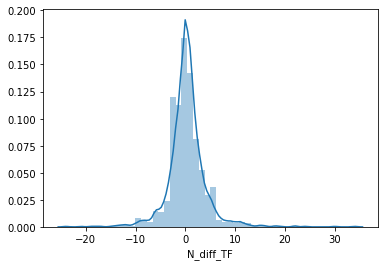

In [134]:
import seaborn as sns
sns.distplot(final_df_values['N_diff_TF'])

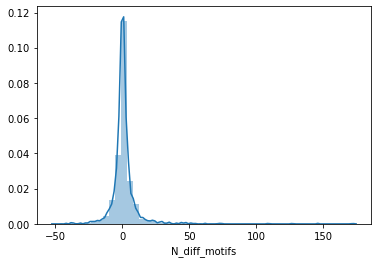

In [135]:
import seaborn as sns
sns.distplot(final_df_values['N_diff_motifs'])

In [139]:
final_df_values[final_df_values['N_diff_TF']==0].shape

(361, 5)

### Check snp2tfbs database 

In [5]:
snps = pd.read_csv('design/SNP_list_master.txt', sep='\t', header=None)
snps.head()

,0
0,rs12705390
1,rs17477177
2,rs62481856
3,rs2392929
4,rs13225723


In [6]:
snps_database = pd.read_csv('snp2tfbs/snp2tfbs_JASPAR_CORE_2014_vert.bed.gz', sep='\t', header=None)
snps_database.head()

,0,1,2,3,4,5,6,7,8
0,chr1,10615,10616,CCGCCGTTGCAAAGGCGCGCCG,C,rs376342519,1,NRF1,10
1,chr1,11011,11012,C,G,rs544419019,2,"PLAG1,EGR1","609,-186"
2,chr1,13109,13110,G,A,rs540538026,3,"ZNF263,PRDM1,SPIB","376,-9,0"
3,chr1,13115,13116,T,G,rs62635286,2,"ZNF263,PRDM1","376,-9"
4,chr1,13117,13118,A,G,rs200579949,2,"ZNF263,PRDM1","376,-9"


In [7]:
snps.columns = ['SNP']
snps_database.columns = ['chr','start','end','ref','alt','SNP','N_TF','TF','Binding']
snps_database.head()

,chr,start,end,ref,alt,SNP,N_TF,TF,Binding
0,chr1,10615,10616,CCGCCGTTGCAAAGGCGCGCCG,C,rs376342519,1,NRF1,10
1,chr1,11011,11012,C,G,rs544419019,2,"PLAG1,EGR1","609,-186"
2,chr1,13109,13110,G,A,rs540538026,3,"ZNF263,PRDM1,SPIB","376,-9,0"
3,chr1,13115,13116,T,G,rs62635286,2,"ZNF263,PRDM1","376,-9"
4,chr1,13117,13118,A,G,rs200579949,2,"ZNF263,PRDM1","376,-9"


In [8]:
snps_database[snps_database['SNP'].isin(snps['SNP'])].shape

(1035, 9)

In [9]:
snps.shape

(4608, 1)

In [10]:
# I found 1035 SNPs on this database from 4608

In [11]:
affected_tf = snps_database[snps_database['SNP'].isin(snps['SNP'])]
affected_tf.N_TF.value_counts()

1    741
2    200
3     50
4     26
5     11
6      7
Name: N_TF, dtype: int64

In [24]:
snps_database.shape

(3432802, 9)

In [28]:
affected_tf[affected_tf['N_TF']==1]['Binding'].value_counts()

0       382
5         6
-372      5
-38       5
12        5
       ... 
-162      1
191       1
131       1
280       1
68        1
Name: Binding, Length: 235, dtype: int64

### compare FIMO results snp2tfbs 

In [12]:
final_df_values.head()

,SNP,TF_WT,TF_SNP,N_diff_motifs,N_diff_TF
0,rs2055449,"{'FOXD1', 'AR'}",set(),7,2
1,rs2055450,{'ZNF182'},set(),1,1
2,rs4312035,set(),{'MEIS1'},-1,-1
3,rs653320,set(),{'E2F7'},-1,-1
4,rs670401,set(),set(),0,0


In [13]:
affected_tf.head()

,chr,start,end,ref,alt,SNP,N_TF,TF,Binding
1958,chr1,1680035,1680036,C,G,rs4648620,1,Arnt_Ahr,0
1964,chr1,1684757,1684758,G,A,rs2072926,5,"EGR1,ZNF263,EGR2,SP2,KLF5","-241,-114,-85,-28,-7"
1965,chr1,1684799,1684800,G,A,rs2072927,1,Zfx,-156
1973,chr1,1691049,1691050,C,T,rs35672141,1,SP2,-44
1974,chr1,1693725,1693726,A,G,rs17162854,1,SRF,-133


In [16]:
final_df_values['SNP'].shape

(4665,)

In [50]:
final_df_values[final_df_values['SNP']=='rs2272006']

,SNP,TF_WT,TF_SNP,N_diff_motifs,N_diff_TF
2634,rs2272006,{'ZBTB1'},{'NR6A1'},0,0
